In [1]:
import numpy as np
import skystar as ss
import matplotlib.pyplot as plt
from skystar.model import Simple_RNN
from skystar.dataloader import SeqDataloader
from skystar.dataset import Dataset
from skystar.optimizer import Adam
from skystar.model import Better_RNN
from skystar.core import mean_squared_error

def sin(x):
    y=np.sin(x)
    return y

'''生成sin数据'''
timestep=np.arange(0,999,1)#999个数据
data=sin(np.linspace(0,4*np.pi,1000))+ np.random.normal(-0.025, 0.025,size=1000)

x_train=data[0:999]
y_train=data[1:1000]#表示x_train下一时间步的数据
data

GPU enabled


array([ 0.00318614, -0.04179623, -0.0030842 , -0.00377731,  0.02693938,
        0.02593879,  0.05582197,  0.08679505,  0.05549471,  0.07855465,
        0.1246176 ,  0.14721475,  0.14984333,  0.12352412,  0.15403129,
        0.22041607,  0.14783039,  0.16828085,  0.20912082,  0.22026   ,
        0.22448635,  0.22659043,  0.25675017,  0.28003441,  0.25690677,
        0.29729119,  0.33954215,  0.30138349,  0.31668037,  0.28767048,
        0.37332089,  0.35419168,  0.36014515,  0.38581172,  0.37434169,
        0.39867378,  0.42505831,  0.40388345,  0.43170553,  0.46527744,
        0.40688477,  0.48164572,  0.46760499,  0.50521593,  0.48810009,
        0.53864152,  0.51469811,  0.50745542,  0.57416685,  0.54345012,
        0.53665882,  0.56243194,  0.60126479,  0.5661642 ,  0.61422948,
        0.66771932,  0.63701083,  0.66208518,  0.66504418,  0.66569769,
        0.70570072,  0.69325063,  0.70076926,  0.73558135,  0.66205837,
        0.72826764,  0.7086345 ,  0.69545568,  0.74926821,  0.72

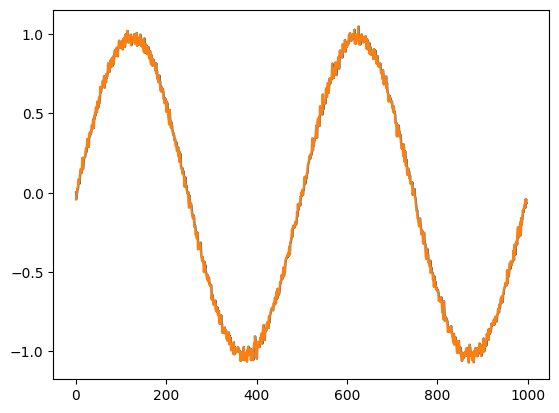

In [2]:
'''查看数据'''
plt.plot(timestep,x_train)
plt.plot(timestep,y_train)
plt.show()

In [3]:
'''创建序列数据集'''
class Sin_dataset(Dataset):#创建数据集
    def __init__(self,training):
        super(Sin_dataset,self).__init__(training=training)
    def prepare(self):
        if self.training:
            self.data=x_train
            self.label=y_train
train = Sin_dataset(training=True)
data_train=SeqDataloader(train,batch_size=30)

In [4]:
'''模型训练'''
model=Better_RNN(300,1)
model.to_gpu()
data_train.to_gpu()
epoch=100
lr=0.01
optimizer=Adam(lr).setup(model)
# for x in range(epoch):
#     model.reset_state()
#     loss,count=0,0
#     for x,t in data_train:
#         y=model(x)
#         loss+=mean_squared_error(y,t)
#         count+=1
#         if count>=len(data_train):
#             print(f"count:{count}   len:{len(data_train)}")
#             print("===============================")
#         if count%30==0 or count==len(data_train):#每30个数据截断连接并反向传播
#             model.cleangrads()
#             loss.backward()
#             loss.unchain_backward()
#             optimizer.update()
#     avg_loss=loss/count
#     print(f'Train_Loss {avg_loss}')
model.TrainForSeq(data_train,epoch=epoch,optimizer=Adam, sleep=False)

Training begin：
GPU is available, and all parameters are converted to cp.ndarray
Epoch 1:


Training: 100%|██████████| 34/34 [00:00<00:00, 67.98it/s]


Train_Loss Variable(0.29286724295681726)
Epoch 2:


Training: 100%|██████████| 34/34 [00:00<00:00, 130.58it/s]


Train_Loss Variable(0.10251261339739524)
Epoch 3:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.25it/s]


Train_Loss Variable(0.12644804338778712)
Epoch 4:


Training: 100%|██████████| 34/34 [00:00<00:00, 162.68it/s]


Train_Loss Variable(0.06916719604796301)
Epoch 5:


Training: 100%|██████████| 34/34 [00:00<00:00, 158.52it/s]


Train_Loss Variable(0.031747882562199334)
Epoch 6:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.10it/s]


Train_Loss Variable(0.02535436753267246)
Epoch 7:


Training: 100%|██████████| 34/34 [00:00<00:00, 131.65it/s]


Train_Loss Variable(0.03269594011479314)
Epoch 8:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.35it/s]


Train_Loss Variable(0.0359385850266848)
Epoch 9:


Training: 100%|██████████| 34/34 [00:00<00:00, 139.53it/s]


Train_Loss Variable(0.025670887528501496)
Epoch 10:


Training: 100%|██████████| 34/34 [00:00<00:00, 144.12it/s]


Train_Loss Variable(0.013455867525096149)
Epoch 11:


Training: 100%|██████████| 34/34 [00:00<00:00, 144.49it/s]


Train_Loss Variable(0.01166605376566704)
Epoch 12:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.15it/s]


Train_Loss Variable(0.015811957336078333)
Epoch 13:


Training: 100%|██████████| 34/34 [00:00<00:00, 129.77it/s]


Train_Loss Variable(0.016717652067725644)
Epoch 14:


Training: 100%|██████████| 34/34 [00:00<00:00, 148.55it/s]


Train_Loss Variable(0.014079757890408037)
Epoch 15:


Training: 100%|██████████| 34/34 [00:00<00:00, 168.18it/s]


Train_Loss Variable(0.01107389389928895)
Epoch 16:


Training: 100%|██████████| 34/34 [00:00<00:00, 118.65it/s]


Train_Loss Variable(0.008897965946013544)
Epoch 17:


Training: 100%|██████████| 34/34 [00:00<00:00, 137.02it/s]


Train_Loss Variable(0.008474169237467563)
Epoch 18:


Training: 100%|██████████| 34/34 [00:00<00:00, 142.61it/s]


Train_Loss Variable(0.009547965395105919)
Epoch 19:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.72it/s]


Train_Loss Variable(0.009745977075393814)
Epoch 20:


Training: 100%|██████████| 34/34 [00:00<00:00, 156.40it/s]


Train_Loss Variable(0.008344117331380846)
Epoch 21:


Training: 100%|██████████| 34/34 [00:00<00:00, 151.72it/s]


Train_Loss Variable(0.007189785672616432)
Epoch 22:


Training: 100%|██████████| 34/34 [00:00<00:00, 152.92it/s]


Train_Loss Variable(0.007080293228692313)
Epoch 23:


Training: 100%|██████████| 34/34 [00:00<00:00, 169.22it/s]


Train_Loss Variable(0.007205300356828507)
Epoch 24:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.82it/s]


Train_Loss Variable(0.0071758791003511645)
Epoch 25:


Training: 100%|██████████| 34/34 [00:00<00:00, 124.91it/s]


Train_Loss Variable(0.006919590543103438)
Epoch 26:


Training: 100%|██████████| 34/34 [00:00<00:00, 146.52it/s]


Train_Loss Variable(0.0063622072075972605)
Epoch 27:


Training: 100%|██████████| 34/34 [00:00<00:00, 148.88it/s]


Train_Loss Variable(0.0059791010326015435)
Epoch 28:


Training: 100%|██████████| 34/34 [00:00<00:00, 151.75it/s]


Train_Loss Variable(0.006016966485703301)
Epoch 29:


Training: 100%|██████████| 34/34 [00:00<00:00, 135.66it/s]


Train_Loss Variable(0.0060124947784196995)
Epoch 30:


Training: 100%|██████████| 34/34 [00:00<00:00, 141.96it/s]


Train_Loss Variable(0.005786406622457935)
Epoch 31:


Training: 100%|██████████| 34/34 [00:00<00:00, 142.75it/s]


Train_Loss Variable(0.005561246506461671)
Epoch 32:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.21it/s]


Train_Loss Variable(0.0053961587497111186)
Epoch 33:


Training: 100%|██████████| 34/34 [00:00<00:00, 152.62it/s]


Train_Loss Variable(0.005309917910629549)
Epoch 34:


Training: 100%|██████████| 34/34 [00:00<00:00, 135.78it/s]


Train_Loss Variable(0.005273483478819443)
Epoch 35:


Training: 100%|██████████| 34/34 [00:00<00:00, 158.23it/s]


Train_Loss Variable(0.00514799067896376)
Epoch 36:


Training: 100%|██████████| 34/34 [00:00<00:00, 151.31it/s]


Train_Loss Variable(0.004981574302894351)
Epoch 37:


Training: 100%|██████████| 34/34 [00:00<00:00, 141.53it/s]


Train_Loss Variable(0.0048878200297512485)
Epoch 38:


Training: 100%|██████████| 34/34 [00:00<00:00, 130.41it/s]


Train_Loss Variable(0.00482077007932203)
Epoch 39:


Training: 100%|██████████| 34/34 [00:00<00:00, 170.40it/s]


Train_Loss Variable(0.004740786368634523)
Epoch 40:


Training: 100%|██████████| 34/34 [00:00<00:00, 162.69it/s]


Train_Loss Variable(0.004650573640685167)
Epoch 41:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.16it/s]


Train_Loss Variable(0.004551615901912796)
Epoch 42:


Training: 100%|██████████| 34/34 [00:00<00:00, 148.55it/s]


Train_Loss Variable(0.004478036535147149)
Epoch 43:


Training: 100%|██████████| 34/34 [00:00<00:00, 132.75it/s]


Train_Loss Variable(0.004421753783932816)
Epoch 44:


Training: 100%|██████████| 34/34 [00:00<00:00, 140.26it/s]


Train_Loss Variable(0.004348837712322858)
Epoch 45:


Training: 100%|██████████| 34/34 [00:00<00:00, 167.43it/s]


Train_Loss Variable(0.004273547146736412)
Epoch 46:


Training: 100%|██████████| 34/34 [00:00<00:00, 119.58it/s]


Train_Loss Variable(0.004207150749244868)
Epoch 47:


Training: 100%|██████████| 34/34 [00:00<00:00, 132.77it/s]


Train_Loss Variable(0.004145798818036457)
Epoch 48:


Training: 100%|██████████| 34/34 [00:00<00:00, 129.94it/s]


Train_Loss Variable(0.004087756670333509)
Epoch 49:


Training: 100%|██████████| 34/34 [00:00<00:00, 115.19it/s]


Train_Loss Variable(0.004025320791537537)
Epoch 50:


Training: 100%|██████████| 34/34 [00:00<00:00, 121.91it/s]


Train_Loss Variable(0.003964599996450699)
Epoch 51:


Training: 100%|██████████| 34/34 [00:00<00:00, 132.51it/s]


Train_Loss Variable(0.003911253216453429)
Epoch 52:


Training: 100%|██████████| 34/34 [00:00<00:00, 125.20it/s]


Train_Loss Variable(0.003857888906501818)
Epoch 53:


Training: 100%|██████████| 34/34 [00:00<00:00, 141.55it/s]


Train_Loss Variable(0.003804211313513613)
Epoch 54:


Training: 100%|██████████| 34/34 [00:00<00:00, 155.40it/s]


Train_Loss Variable(0.0037518767329592258)
Epoch 55:


Training: 100%|██████████| 34/34 [00:00<00:00, 137.97it/s]


Train_Loss Variable(0.003701481778702568)
Epoch 56:


Training: 100%|██████████| 34/34 [00:00<00:00, 164.13it/s]


Train_Loss Variable(0.0036533363451020664)
Epoch 57:


Training: 100%|██████████| 34/34 [00:00<00:00, 150.28it/s]


Train_Loss Variable(0.003604684803091016)
Epoch 58:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.31it/s]


Train_Loss Variable(0.0035570080503982493)
Epoch 59:


Training: 100%|██████████| 34/34 [00:00<00:00, 150.73it/s]


Train_Loss Variable(0.0035117767028085005)
Epoch 60:


Training: 100%|██████████| 34/34 [00:00<00:00, 128.36it/s]


Train_Loss Variable(0.0034675927992747456)
Epoch 61:


Training: 100%|██████████| 34/34 [00:00<00:00, 159.82it/s]


Train_Loss Variable(0.003424038429210355)
Epoch 62:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.31it/s]


Train_Loss Variable(0.003380855822927414)
Epoch 63:


Training: 100%|██████████| 34/34 [00:00<00:00, 146.85it/s]


Train_Loss Variable(0.0033389052906001404)
Epoch 64:


Training: 100%|██████████| 34/34 [00:00<00:00, 169.94it/s]


Train_Loss Variable(0.0032982634891428344)
Epoch 65:


Training: 100%|██████████| 34/34 [00:00<00:00, 151.18it/s]


Train_Loss Variable(0.003258126497080961)
Epoch 66:


Training: 100%|██████████| 34/34 [00:00<00:00, 147.45it/s]


Train_Loss Variable(0.0032187713933186776)
Epoch 67:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.80it/s]


Train_Loss Variable(0.0031803249845376567)
Epoch 68:


Training: 100%|██████████| 34/34 [00:00<00:00, 139.28it/s]


Train_Loss Variable(0.003142885071283815)
Epoch 69:


Training: 100%|██████████| 34/34 [00:00<00:00, 116.78it/s]


Train_Loss Variable(0.0031062606316571146)
Epoch 70:


Training: 100%|██████████| 34/34 [00:00<00:00, 154.06it/s]


Train_Loss Variable(0.0030702533442123156)
Epoch 71:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.27it/s]


Train_Loss Variable(0.003035010539589305)
Epoch 72:


Training: 100%|██████████| 34/34 [00:00<00:00, 164.05it/s]


Train_Loss Variable(0.003000467418687173)
Epoch 73:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.11it/s]


Train_Loss Variable(0.002966696265390235)
Epoch 74:


Training: 100%|██████████| 34/34 [00:00<00:00, 157.00it/s]


Train_Loss Variable(0.002933696809333409)
Epoch 75:


Training: 100%|██████████| 34/34 [00:00<00:00, 156.56it/s]


Train_Loss Variable(0.0029014065625965492)
Epoch 76:


Training: 100%|██████████| 34/34 [00:00<00:00, 140.20it/s]


Train_Loss Variable(0.0028697753234564263)
Epoch 77:


Training: 100%|██████████| 34/34 [00:00<00:00, 132.78it/s]


Train_Loss Variable(0.0028387633022044813)
Epoch 78:


Training: 100%|██████████| 34/34 [00:00<00:00, 124.81it/s]


Train_Loss Variable(0.0028084482001958177)
Epoch 79:


Training: 100%|██████████| 34/34 [00:00<00:00, 160.73it/s]


Train_Loss Variable(0.0027787880448740835)
Epoch 80:


Training: 100%|██████████| 34/34 [00:00<00:00, 162.86it/s]


Train_Loss Variable(0.0027497236541224206)
Epoch 81:


Training: 100%|██████████| 34/34 [00:00<00:00, 140.72it/s]


Train_Loss Variable(0.002721246148457021)
Epoch 82:


Training: 100%|██████████| 34/34 [00:00<00:00, 163.12it/s]


Train_Loss Variable(0.0026933969063023984)
Epoch 83:


Training: 100%|██████████| 34/34 [00:00<00:00, 149.14it/s]


Train_Loss Variable(0.0026661850877567044)
Epoch 84:


Training: 100%|██████████| 34/34 [00:00<00:00, 173.22it/s]


Train_Loss Variable(0.0026395405022267408)
Epoch 85:


Training: 100%|██████████| 34/34 [00:00<00:00, 145.02it/s]


Train_Loss Variable(0.0026134330043816423)
Epoch 86:


Training: 100%|██████████| 34/34 [00:00<00:00, 144.31it/s]


Train_Loss Variable(0.0025878704688914716)
Epoch 87:


Training: 100%|██████████| 34/34 [00:00<00:00, 141.28it/s]


Train_Loss Variable(0.002562873263919259)
Epoch 88:


Training: 100%|██████████| 34/34 [00:00<00:00, 137.22it/s]


Train_Loss Variable(0.0025384216493090613)
Epoch 89:


Training: 100%|██████████| 34/34 [00:00<00:00, 141.34it/s]


Train_Loss Variable(0.0025144849237415394)
Epoch 90:


Training: 100%|██████████| 34/34 [00:00<00:00, 166.24it/s]


Train_Loss Variable(0.0024910532245998452)
Epoch 91:


Training: 100%|██████████| 34/34 [00:00<00:00, 159.33it/s]


Train_Loss Variable(0.0024681271013586724)
Epoch 92:


Training: 100%|██████████| 34/34 [00:00<00:00, 132.99it/s]


Train_Loss Variable(0.0024457012327203397)
Epoch 93:


Training: 100%|██████████| 34/34 [00:00<00:00, 151.75it/s]


Train_Loss Variable(0.002423751384337378)
Epoch 94:


Training: 100%|██████████| 34/34 [00:00<00:00, 127.95it/s]


Train_Loss Variable(0.002402261394851036)
Epoch 95:


Training: 100%|██████████| 34/34 [00:00<00:00, 155.56it/s]


Train_Loss Variable(0.002381228666865519)
Epoch 96:


Training: 100%|██████████| 34/34 [00:00<00:00, 124.34it/s]


Train_Loss Variable(0.0023606555005172354)
Epoch 97:


Training: 100%|██████████| 34/34 [00:00<00:00, 135.70it/s]


Train_Loss Variable(0.0023405284809065344)
Epoch 98:


Training: 100%|██████████| 34/34 [00:00<00:00, 120.03it/s]


Train_Loss Variable(0.0023208272556405896)
Epoch 99:


Training: 100%|██████████| 34/34 [00:00<00:00, 130.13it/s]


Train_Loss Variable(0.002301541760157979)
Epoch 100:


Training: 100%|██████████| 34/34 [00:00<00:00, 151.08it/s]

Train_Loss Variable(0.0022826708458436196)
Saving the model params......
Params saved！path:D:\Programing\pythonProject\Starsky\skystar\model_params\Better_RNN


In [5]:
'''生成一个cos序列，并预测'''
model.reset_state()
xs=np.cos(np.linspace(0,4*np.pi,1000))
out=[]
model.to_cpu()
count=0
with ss.no_grad():
    for x in xs:
        count += 1
        x = ss.Variable(np.array(x).reshape(1, 1))
        y = model(x)
        y.data = y.data.squeeze()
        out.append(y.data)
len(out)

1000

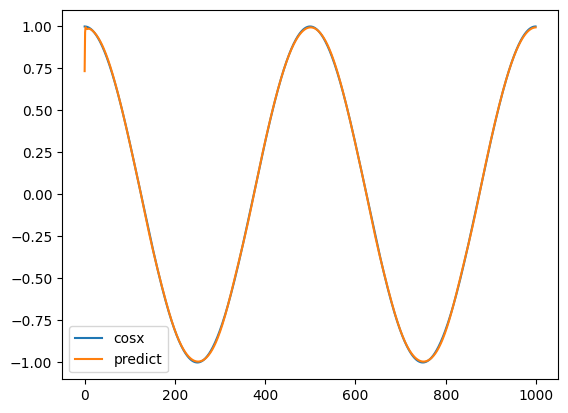

In [6]:
'''预测结果查看'''
list=np.arange(0,1000,1)
plt.plot(list,xs,label='cosx')
plt.plot(list,out,label='predict')
plt.legend()
plt.show()